In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

# REGRESIÓN LINEAL SIMPLE

In [287]:
df_1=pd.read_csv('C:/Users/USUARIO/Desktop/Materias Utadeo/ESTADISTICA/ESTADISTICA 2024-1S/DATOS/DATOS_REGRESION_1.csv',sep=',')

### Exploremos los datos

In [288]:
print(df_1.shape)

(700, 2)


In [289]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [290]:
df_1.columns

Index(['x', 'y'], dtype='object')

In [291]:
nulos = df_1.isnull().sum()
print(nulos)


x    0
y    1
dtype: int64


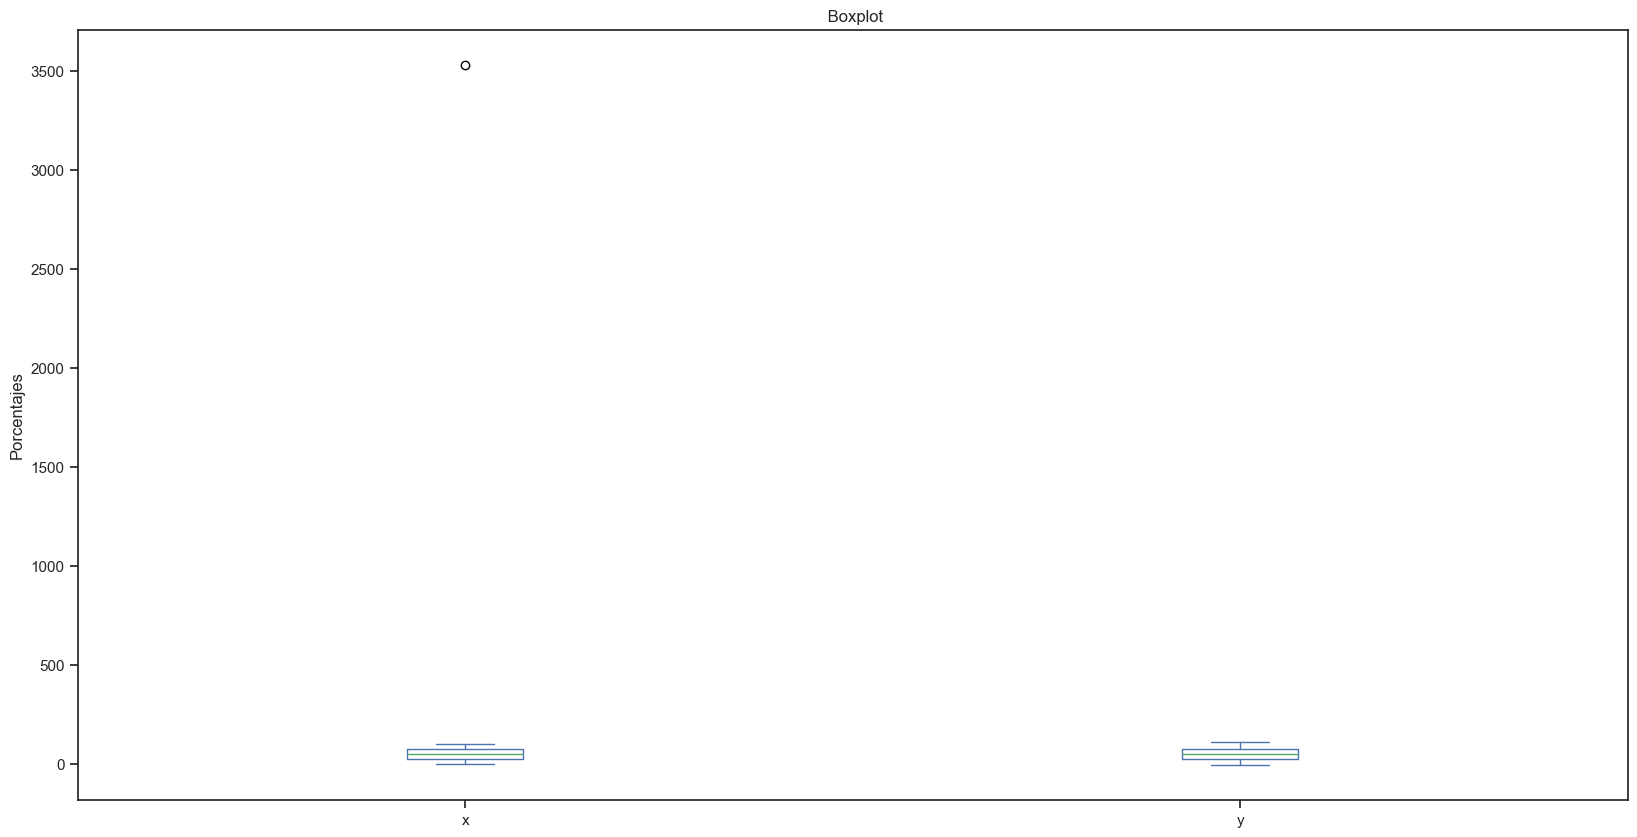

In [292]:
df_1.plot.box(figsize=(20,10))
plt.xlabel("")
plt.ylabel("Porcentajes")
plt.title(" Boxplot")
plt.show()

In [293]:
df_1.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [294]:
df_1=df_1[df_1['x']<3000] #Filtramos los datos para eliminar el dato atípico

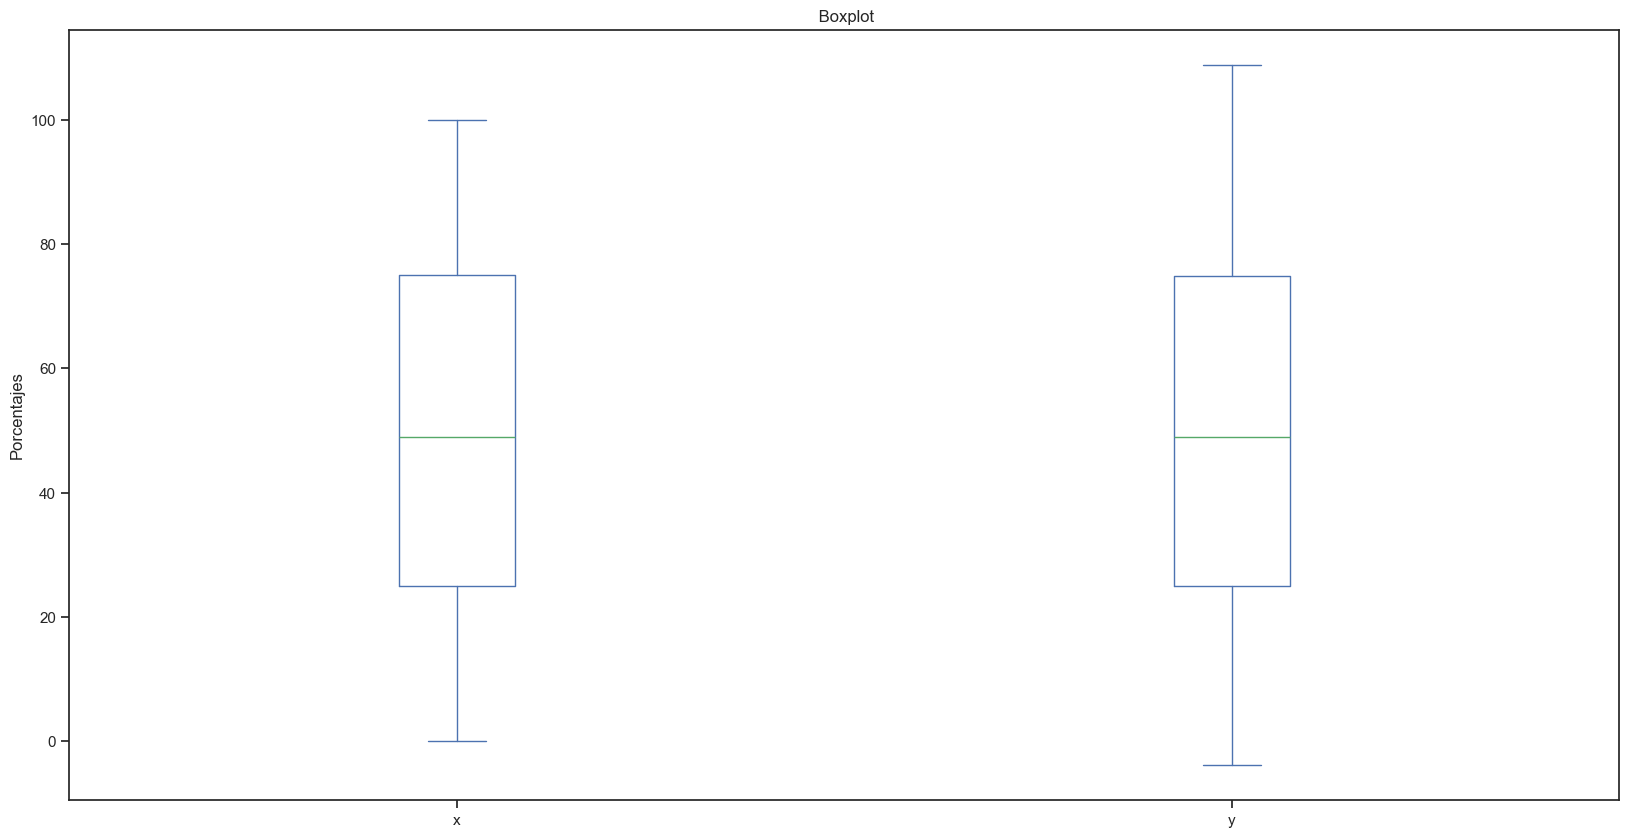

In [295]:
df_1.plot.box(figsize=(20,10))
plt.xlabel("")
plt.ylabel("Porcentajes")
plt.title(" Boxplot")
plt.show()

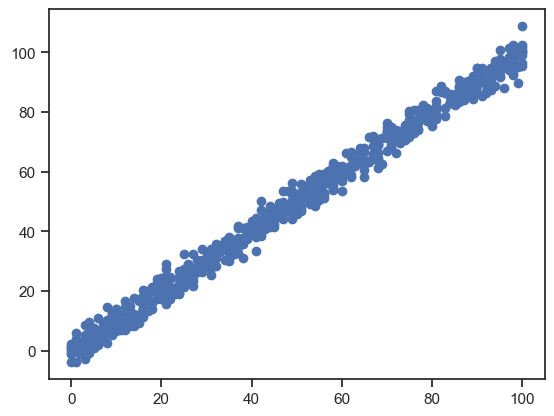

In [296]:
plt.scatter(df_1["x"],df_1["y"]) # Permite ver la relación entre dos o mas variables de forma simultanea
plt.show()

         x        y
x  1.00000  0.99534
y  0.99534  1.00000


<Axes: >

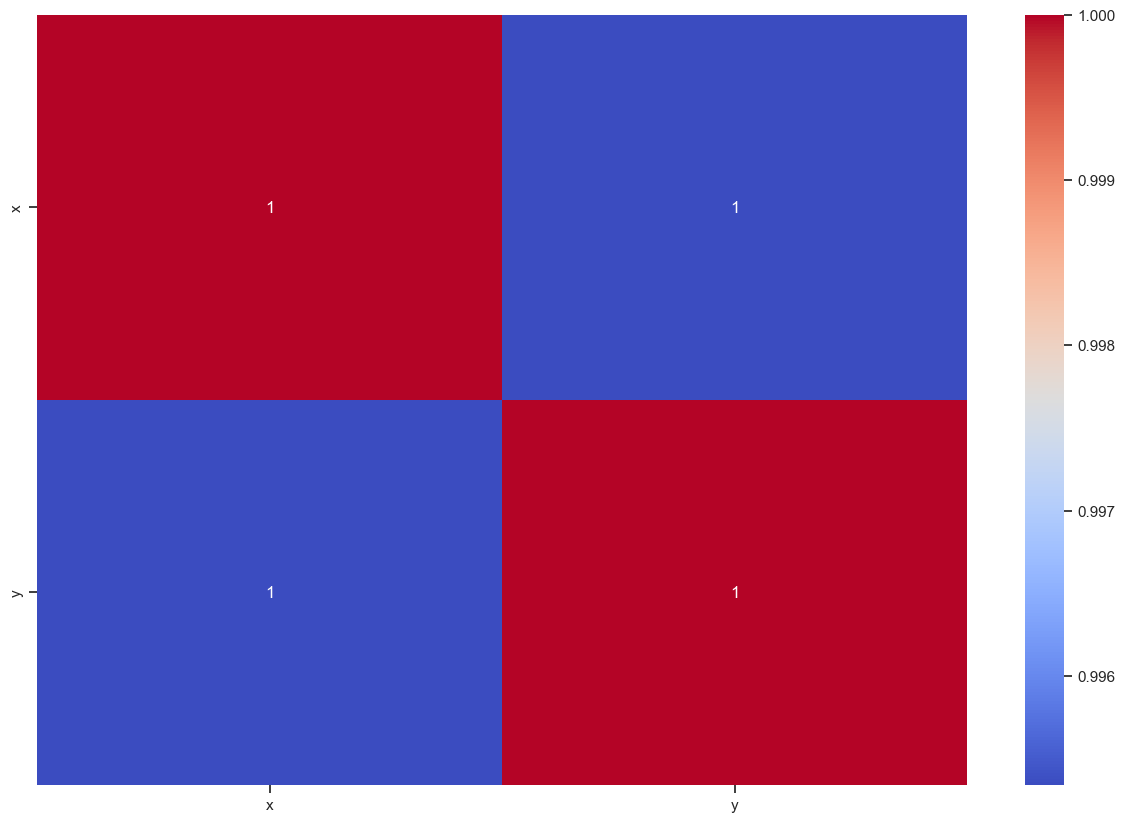

In [297]:
correlacion=df_1.corr(method='pearson')
import seaborn as sns
print(correlacion)
plt.figure(figsize=(15,10))
sns.heatmap(correlacion,xticklabels=correlacion.columns,yticklabels=correlacion.columns,cmap='coolwarm',annot=True)

In [298]:
model1 = 'y~x'
lm1   = sm.ols(formula = model1, data = df_1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:41:04   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1073      0.212     -0.506      0.6

# REGRESIÓN LINEAL MÚLTIPLE

In [311]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Cargar el conjunto de datos
california_housing = fetch_california_housing()

# Crear un DataFrame con los datos y las características
df_2 = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df_2['MedHouseVal'] = california_housing.target


* MedInc: Ingreso medio de los habitantes de la zona en unidades de $10,000.
* HouseAge: Edad media de las casas en la zona.
* AveRooms: Promedio de habitaciones por vivienda. Esta variable indica el promedio de habitaciones totales por cada vivienda en una zona determinada. Incluye no solo dormitorios (bedrooms), sino también otras habitaciones como salas de estar, comedores, estudios, etc. Es una medida general del espacio habitable promedio en las viviendas de esa área.
* AveBedrms: Promedio de dormitorios por vivienda. Se centra específicamente en el promedio de dormitorios por cada vivienda en la zona. Esto incluye solo las habitaciones designadas para dormir, excluyendo otras habitaciones como salas de estar o estudios. Es una medida más específica del número promedio de lugares para dormir en las viviendas.
* Population: Población total en la zona.
* AveOccup: Promedio de ocupantes por vivienda.
* Latitude: Latitud de la localización de la zona.
* Longitude: Longitud de la localización de la zona.
* MedHouseVal: Valor medio de las casas en miles de dólares (variable objetivo a predecir).

In [312]:
df_2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [301]:
print(df_2.shape)

(20640, 9)


In [302]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [303]:
nulos = df_2.isnull().sum()
print(nulos)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [304]:
df_2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [305]:
df_2=df_2[df_2['AveOccup']<5]

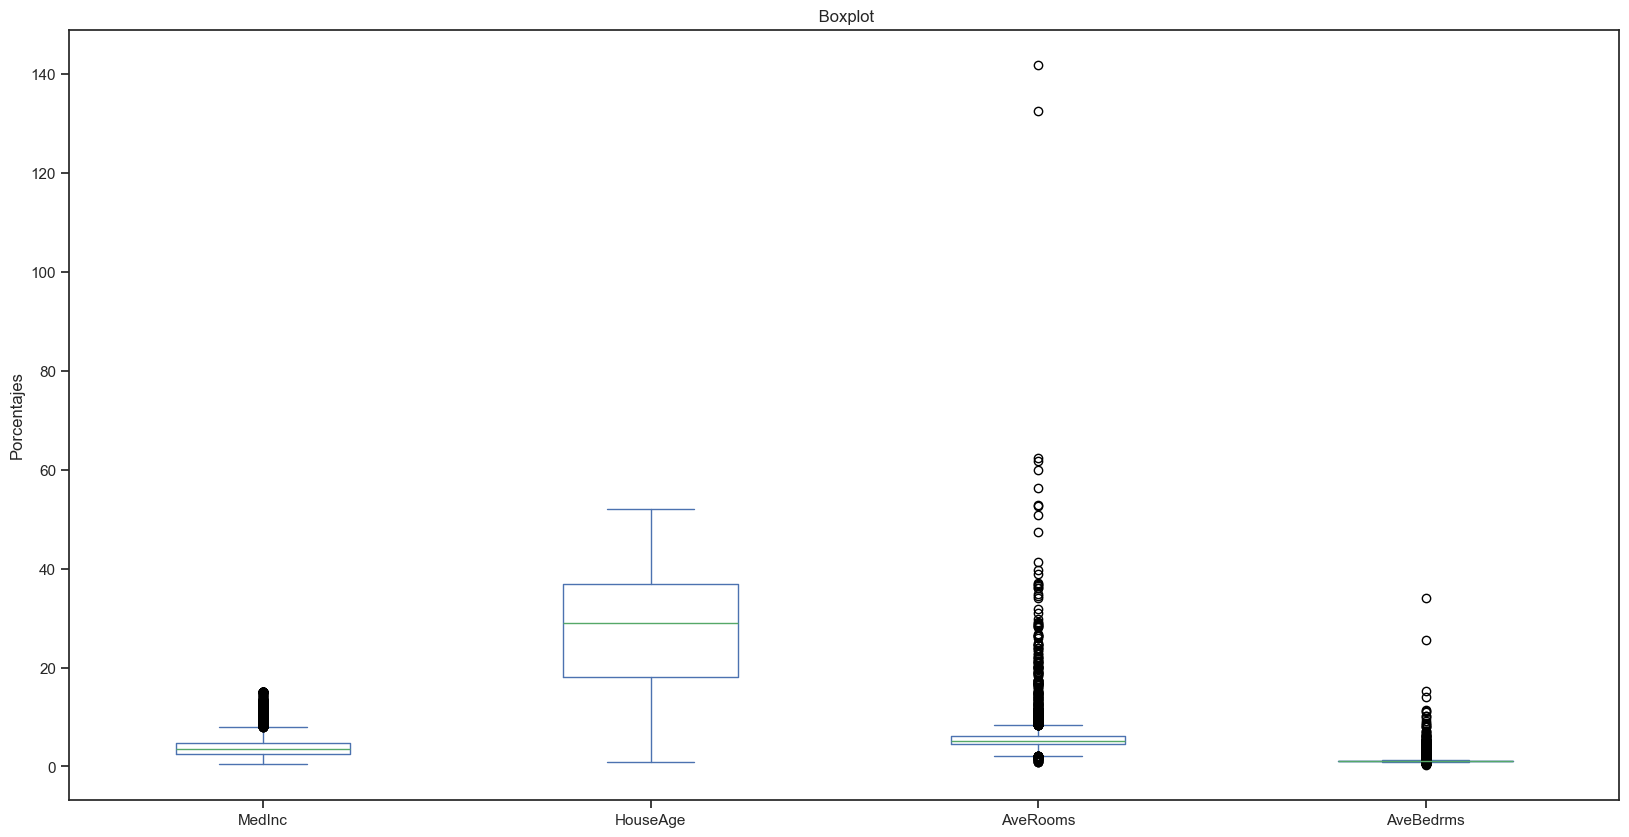

In [306]:
df_2.loc[:,"MedInc":"AveBedrms"].plot.box(figsize=(20,10))
plt.xlabel("")
plt.ylabel("Porcentajes")
plt.title(" Boxplot")
plt.show()

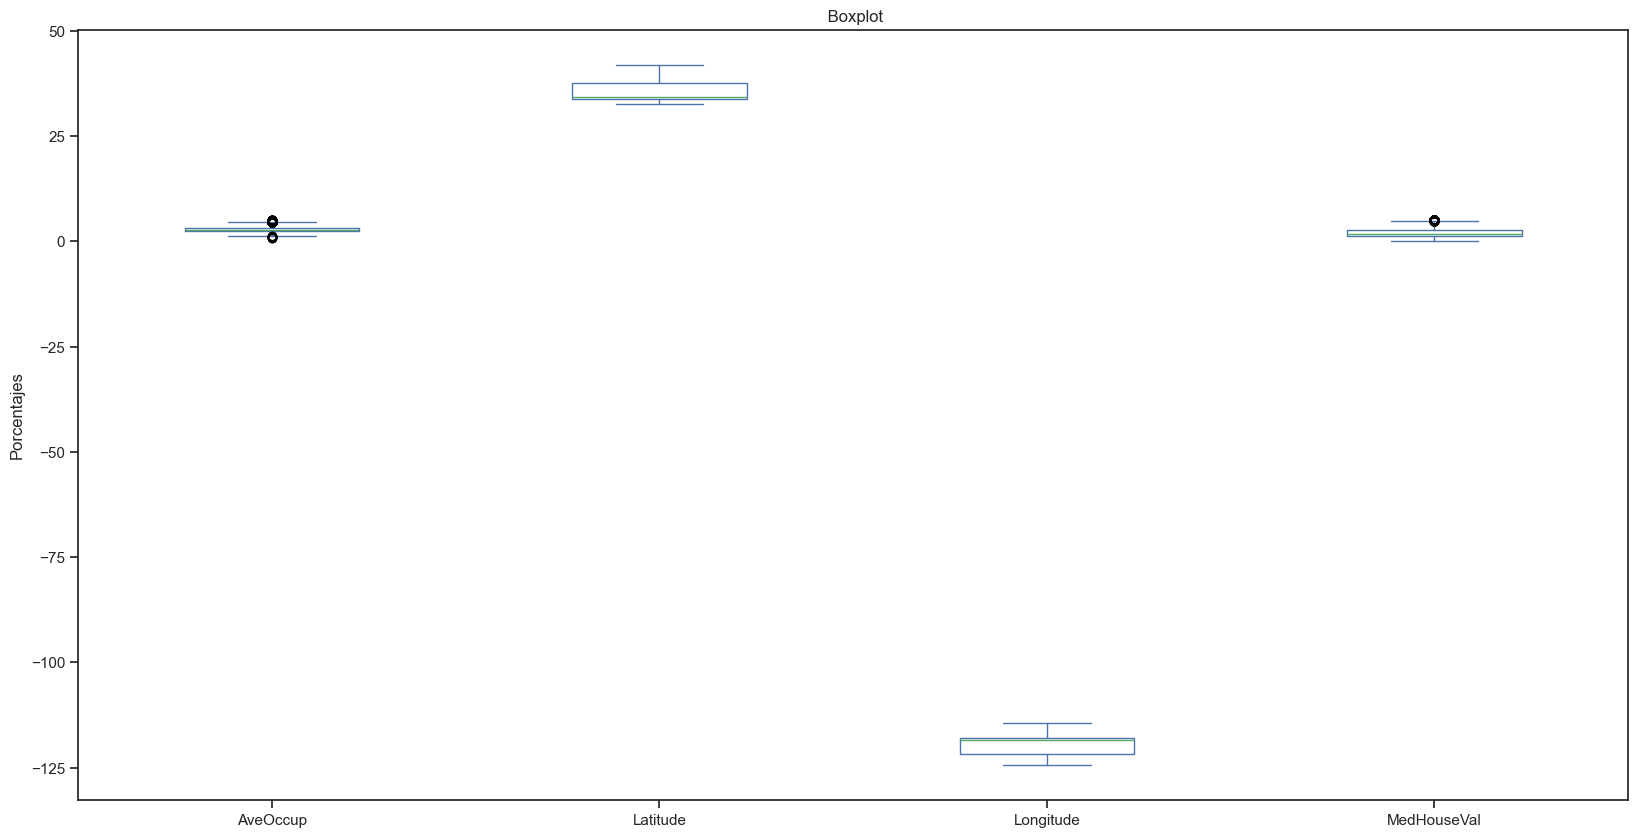

In [307]:
df_2.loc[:,"AveOccup":"MedHouseVal"].plot.box(figsize=(20,10))
plt.xlabel("")
plt.ylabel("Porcentajes")
plt.title(" Boxplot")
plt.show()

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119788  0.324770  -0.062904    0.008656 -0.049837   
HouseAge    -0.119788  1.000000 -0.154228  -0.078677   -0.304796 -0.012420   
AveRooms     0.324770 -0.154228  1.000000   0.849327   -0.071642 -0.041484   
AveBedrms   -0.062904 -0.078677  0.849327   1.000000   -0.067273 -0.078912   
Population   0.008656 -0.304796 -0.071642  -0.067273    1.000000  0.185077   
AveOccup    -0.049837 -0.012420 -0.041484  -0.078912    0.185077  1.000000   
Latitude    -0.082655  0.011921  0.104631   0.069137   -0.110564 -0.166164   
Longitude   -0.013678 -0.109920 -0.025575   0.014375    0.101145  0.176610   
MedHouseVal  0.689559  0.107760  0.149527  -0.047637   -0.023264 -0.278652   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.082655  -0.013678     0.689559  
HouseAge     0.011921  -0.109920     0.107760  
AveRooms     0.104631  -0.025575     0.149527  
AveBedrms    0.069137   0.0

<Axes: >

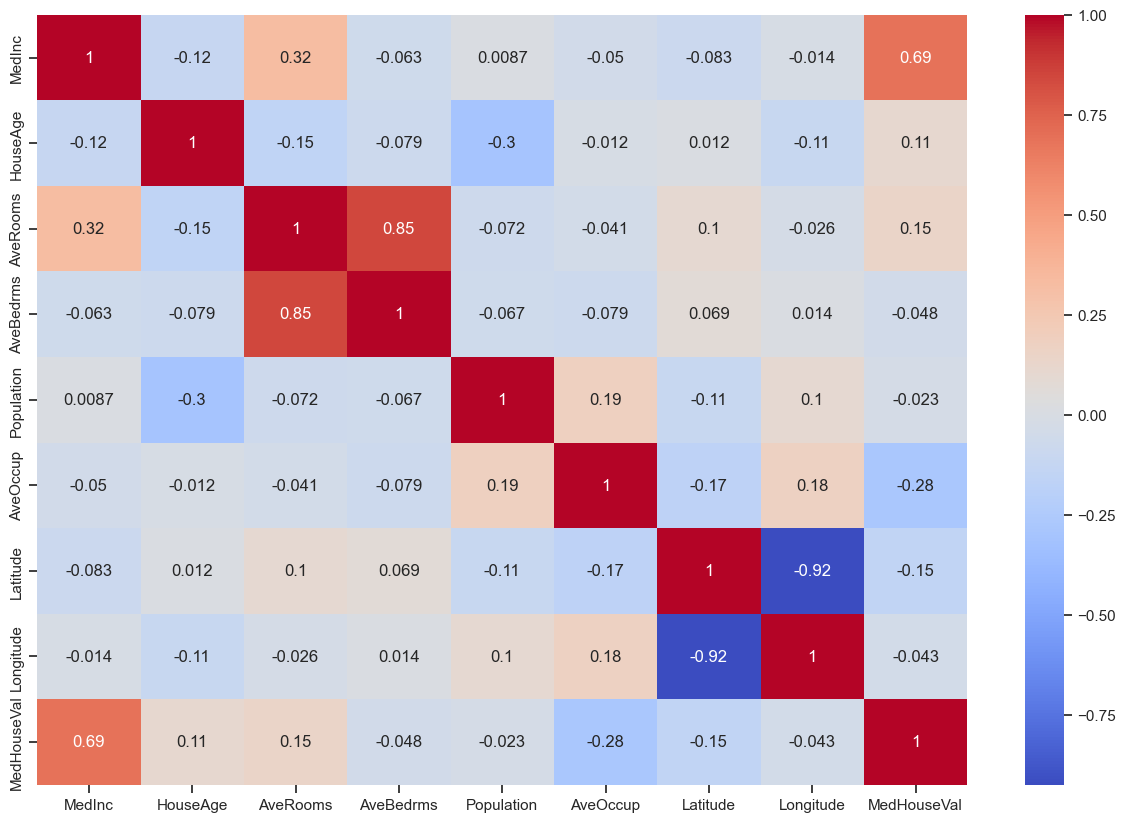

In [308]:
correlacion=df_2.corr(method='pearson')
import seaborn as sns
print(correlacion)
plt.figure(figsize=(15,10))
sns.heatmap(correlacion,xticklabels=correlacion.columns,yticklabels=correlacion.columns,cmap='coolwarm',annot=True)

In [309]:
df_2.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [315]:
model2 = 'MedHouseVal~MedInc+ HouseAge+ AveRooms+ AveBedrms+ Population+ AveOccup+Latitude+ Longitude'
lm1   = sm.ols(formula = model2, data = df_2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:46:45   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.0

### Código para crear un dataframe con un diccionario

In [316]:
# Crear un DataFrame de ejemplo
data = {
    'columna1': [1, 2, 3],
    'columna2': [4, 5, 6],
    'columna3': [7, 8, 9]
}

df= pd.DataFrame(data)
df

,columna1,columna2,columna3
0,1,4,7
1,2,5,8
2,3,6,9
